Assignment 1: Visualize the Data

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import anndata
adata = anndata.read_h5ad('../Data/Brain_AllenData.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 978067 × 550
    obs: 'brain_section_label', 'Slice', 'cluster_alias', 'average_correlation_score', 'matrix_label', 'donor_label', 'low_quality_mapping', 'donor_genotype', 'donor_sex', 'x', 'y', 'z', 'node_size', 'neurotransmitter', 'division', 'class', 'subclass', 'supertype', 'cluster'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'normalization', 'parent', 'parent_layer'


In [3]:
adata.obs_keys()

['brain_section_label',
 'Slice',
 'cluster_alias',
 'average_correlation_score',
 'matrix_label',
 'donor_label',
 'low_quality_mapping',
 'donor_genotype',
 'donor_sex',
 'x',
 'y',
 'z',
 'node_size',
 'neurotransmitter',
 'division',
 'class',
 'subclass',
 'supertype',
 'cluster']

<class 'pandas.core.series.Series'>


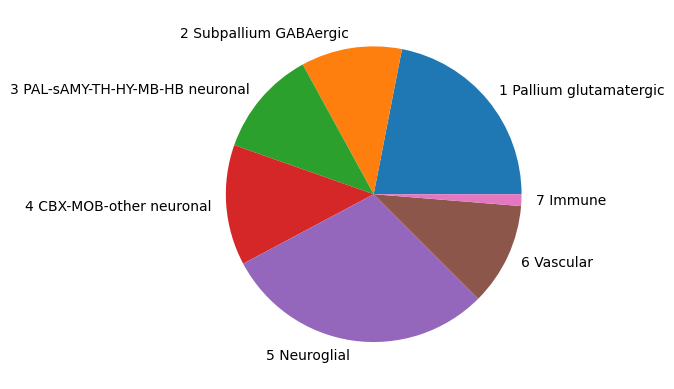

[214535, 107909, 113918, 128824, 290636, 109710, 12535]


In [17]:
fig, axs = plt.subplots()

divisions = adata.obs['division'].value_counts()
divisions = divisions.sort_index()

cell_types = divisions.index
cell_counts = []

for i, division in enumerate(divisions):
    cell_counts.append(division)
    

axs.pie(cell_counts, labels=cell_types)
plt.show()
print(cell_counts)

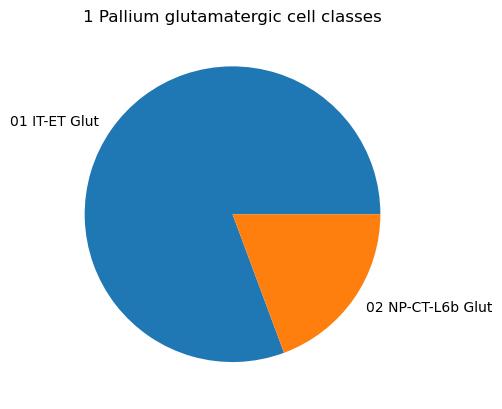

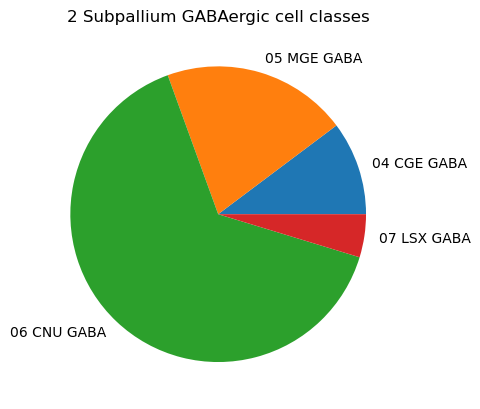

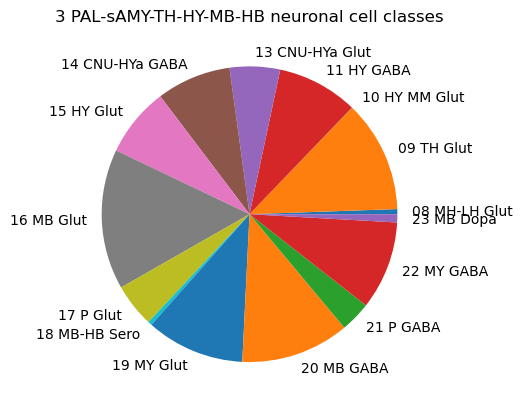

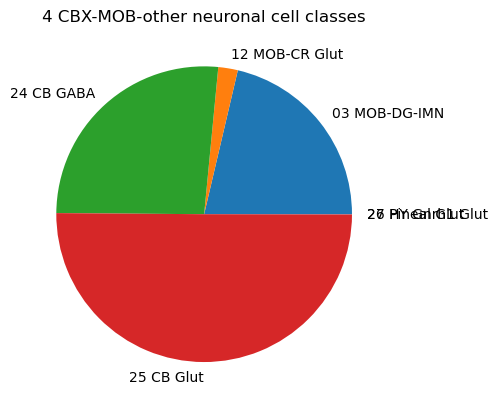

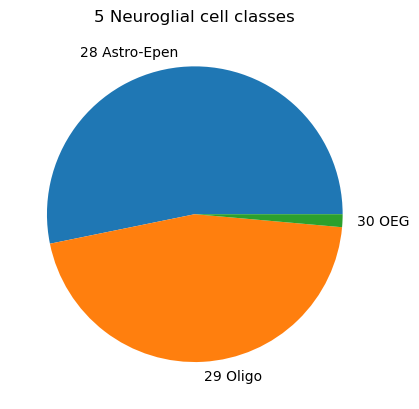

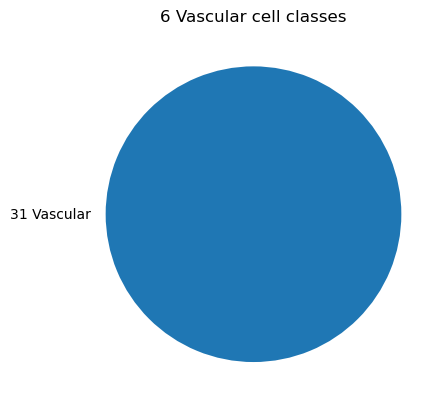

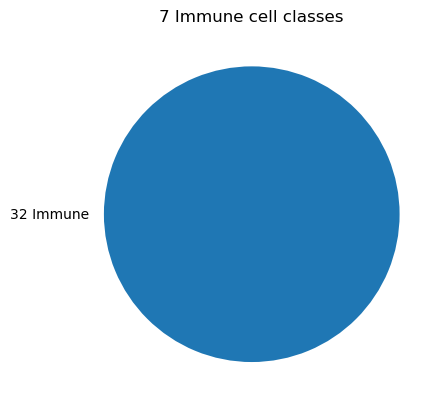

In [36]:
division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()

for i, division_name in enumerate(division_names):
    fig, axs = plt.subplots()

    classes_by_division = adata.obs[adata.obs['division'] == division_name]['class']

    classes = classes_by_division.value_counts()
    classes = classes.sort_index()
    classes = classes[classes != 0]

    cell_types = classes.index
    cell_counts = []

    for i, cell_count in enumerate(classes):
        cell_counts.append(cell_count)
        

    axs.set_title(division_name + ' cell classes')
    axs.pie(cell_counts, labels=cell_types)
    plt.show()







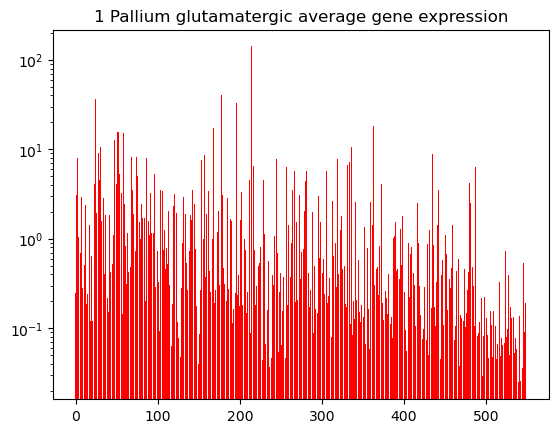

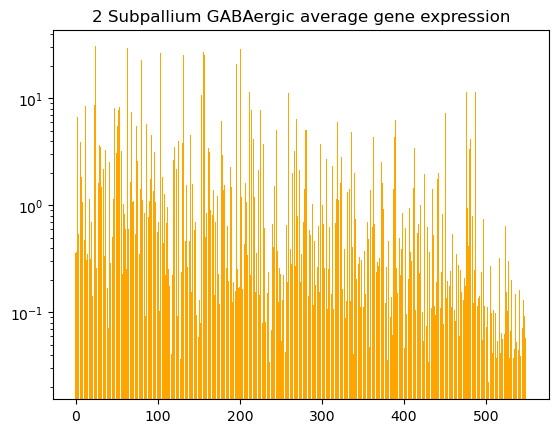

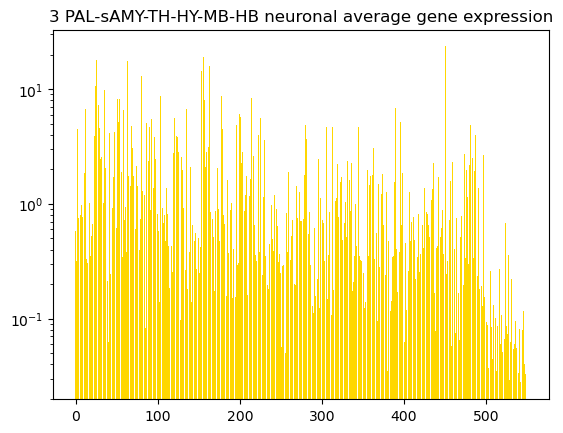

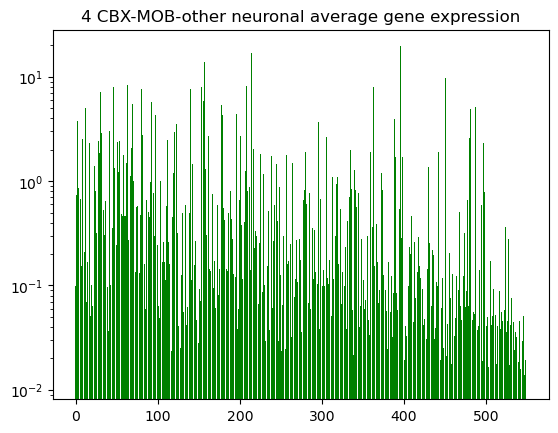

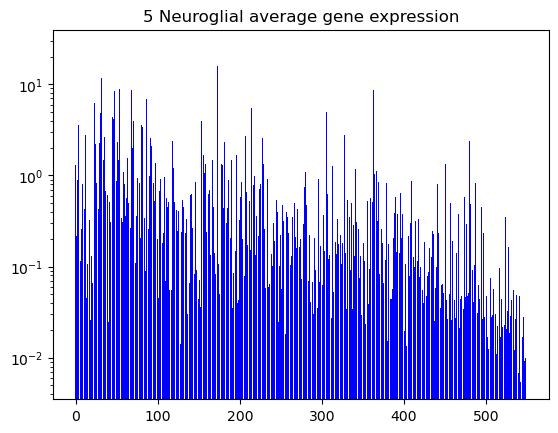

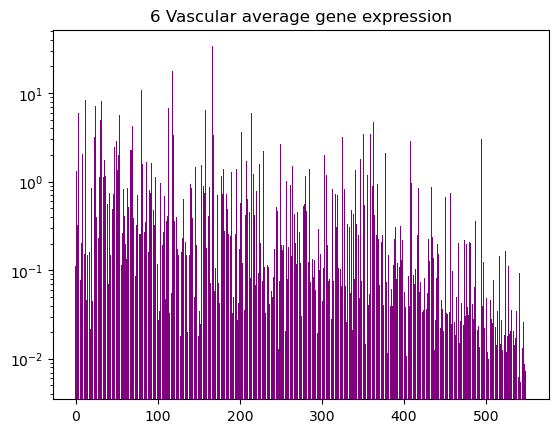

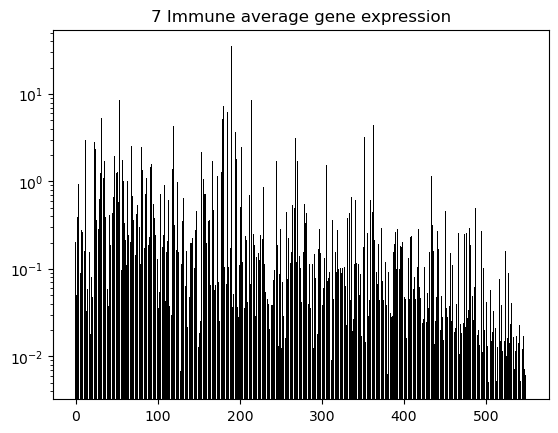

In [4]:
#Look at average gene expression levels in each division

division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple', 'black']

for i, division_name in enumerate(division_names):

    fig, axs = plt.subplots()

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1

    x = np.arange(len(average_expression))  # Create an array of indices
    y = average_expression  # Your array values

    axs.bar(x, y, color=colors[i])
    axs.set_yscale('log')
    axs.set_title(division_name + ' average gene expression')
    plt.show()



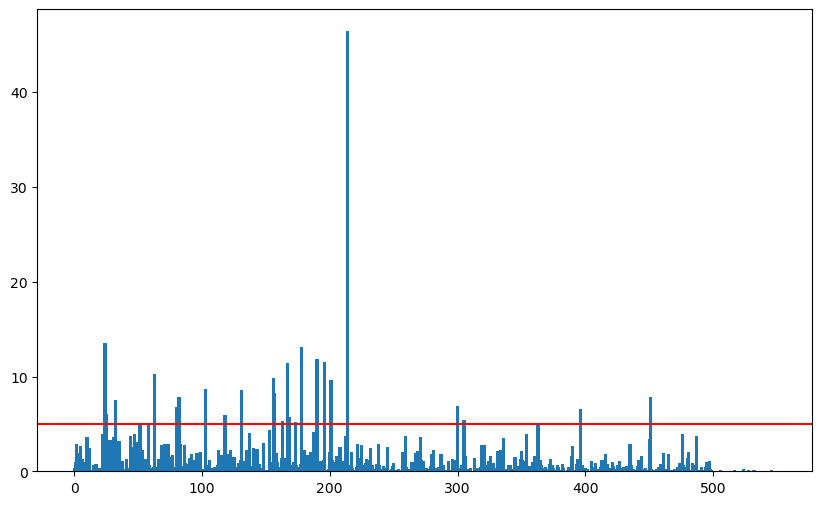

In [8]:
#Look at standard deviations of gene expression levels across divisions

division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

average_expressions = []

for i, division_name in enumerate(division_names):

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1
    average_expressions.append(average_expression)

combined_matrix = np.vstack(average_expressions)

std_deviation = combined_matrix.std(axis=0)

x = np.arange(len(std_deviation))  # Create an array of indices
y = std_deviation  # Your array values

plt.figure(figsize=(10, 6))
plt.bar(x, y, width=2.5)
plt.axhline(y=5, color='red')
plt.show()


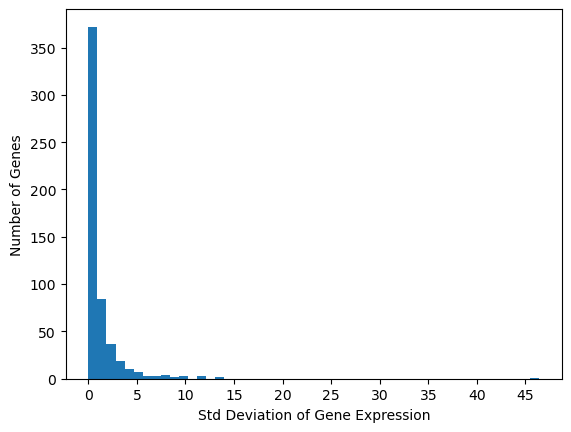

In [20]:
division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']

average_expressions = []

for i, division_name in enumerate(division_names):

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1
    average_expressions.append(average_expression)

combined_matrix = np.vstack(average_expressions)

std_deviation = combined_matrix.std(axis=0)
plt.hist(std_deviation, bins=50)  # Adjust the number of bins as needed
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Std Deviation of Gene Expression')
plt.ylabel('Number of Genes')
plt.show()


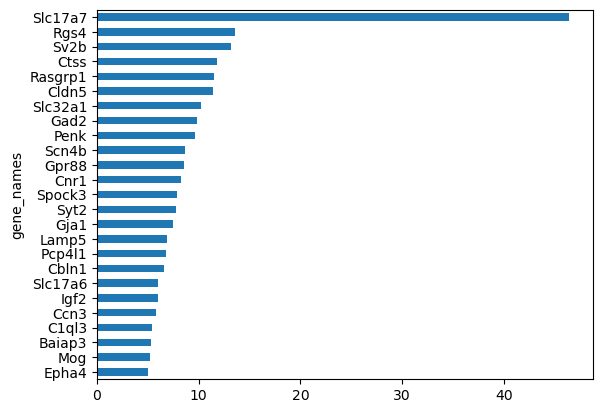

In [22]:
division_names = pd.Series(adata.obs['division'].unique())
division_names = division_names.sort_values()

average_expressions = []

for i, division_name in enumerate(division_names):

    cells_by_division = adata.X[adata.obs['division'] == division_name]
    average_expression = cells_by_division.mean(axis=0).A1
    average_expressions.append(average_expression)

combined_matrix = np.vstack(average_expressions)

std_deviation = combined_matrix.std(axis=0)

df = pd.DataFrame({
    'gene_names': adata.var['gene_symbol'],
    'std_deviation': std_deviation    
})

df = df.sort_values('std_deviation', ascending=False)

#dftop = df.head(20)
dftop = df[df['std_deviation'] >= 5]

fig, ax = plt.subplots()
dftop.plot(kind='barh', x='gene_names', y='std_deviation', ax=ax)
ax.invert_yaxis()
ax.legend().remove()
plt.show()


In [16]:
#Make plots of the expression levels in each division of the top five highest std deviation genes

,gene_symbol,transcript_identifier
gene_identifier,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118
ENSMUSG00000026837,Col5a1,ENSMUST00000028280
ENSMUSG00000001985,Grik3,ENSMUST00000030676
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328
ENSMUSG00000048387,Osr1,ENSMUST00000057021
...,...,...
Blank-33,Blank-33,Blank-33
Blank-34,Blank-34,Blank-34
Blank-45,Blank-45,Blank-45
